In [211]:
import antiCPy
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import mode

In [212]:
from antiCPy.trend_extrapolation.cp_segment_fit import CPSegmentFit

In [213]:
# get a time series
np.random.seed(1234)
Q = 0.25 # noise variance
y1 = np.arange(0,1,0.02) + np.random.normal(0,Q,50)
y2 = 1-np.arange(0,1,0.02) + np.random.normal(0,Q,50)
y = np.concatenate((y1,y2))
x = np.arange(len(y))-20

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

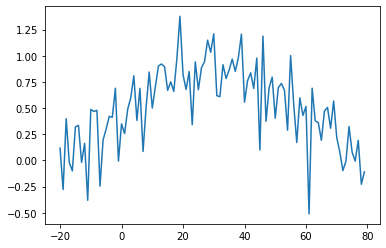

In [214]:
plt.plot(x,y)
plt.scatter

In [215]:
Fit = CPSegmentFit(x_data = x,
             y_data = y,
             number_expected_changepoints = 1,
             num_MC_cp_samples = 1000000,
                   z_array_size = 100
                  )

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  98


In [216]:
print(Fit.num_of_cp_configs)

98


In [217]:
print(1)
Fit.initialize_MC_cp_configurations(print_sum_control = True)
print(2)
Fit.initialize_A_matrices()
try:
    print("Q")
    Fit.Q_matrix_and_inverse_Q()
except np.linalg.LinAlgError as err:
    if 'Singular matrix' in str(err):
        print("nonQ1")
        Fit.initialize_MC_cp_configurations()
        print("nonQ2")
        Fit.initialize_A_matrices()

1
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[-19]
 [-18]
 [-17]
 [-16]
 [-15]
 [-14]
 [-13]
 [-12]
 [-11]
 [-10]
 [ -9]
 [ -8]
 [ -7]
 [ -6]
 [ -5]
 [ -4]
 [ -3]
 [ -2]
 [ -1]
 [  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]]
Possible configs shape:  (98, 1)
composition_dummy:  [[-20. -19.  79.]
 [-20. -18.  79.]
 [-20. -17.  79.]
 [-20. -16.  79.]
 [-20. -15.  79.]
 [-20. -14.  79.]
 [-20. -13.  79.]
 [-20. -12.  79.]
 [-20. -11.  79.]
 [-20. -10.  

In [218]:

Fit.calculate_f0()
Fit.calculate_residue()
Fit.calculate_marginal_likelihood()
Fit.calculate_marginal_cp_pdf()

In [219]:
Fit.calculate_prob_cp()

In [220]:
def Reduced(x):
    # Reduces the range of the x axis to suit the calculated probability, 
    # i.e. drops first and last values
    X = x[1:]
    return(X[:-1])

Text(0.5, 1.0, 'Distribution of the Change Point')

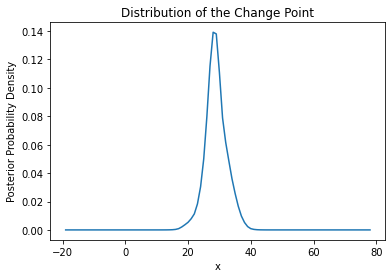

In [221]:
plt.plot(Reduced(x),Fit.prob_cp)
plt.xlabel("x")
plt.ylabel("Posterior Probability Density")
plt.title("Distribution of the Change Point")

In [222]:
# all in one function
def CP_Distribution(x,Y,n):
    y = np.sort(Y)
    
    
    CPFit = CPSegmentFit(x_data = x,
                         y_data = y,
                         number_expected_changepoints = n,
                         num_MC_cp_samples = 1000000,
                         z_array_size = 100                         
                        )
    
    CPFit.initialize_MC_cp_configurations(print_sum_control = True)
    CPFit.initialize_A_matrices()
    try:
        CPFit.Q_matrix_and_inverse_Q()
    except np.linalg.LinAlgError as err:
        if 'Singular matrix' in str(err):
            CPFit.initialize_MC_cp_configurations()
            CPFit.initialize_A_matrices()
            
    
    CPFit.calculate_f0()
    CPFit.calculate_residue()
    CPFit.calculate_marginal_likelihood()
    CPFit.calculate_marginal_cp_pdf()
    CPFit.calculate_prob_cp()
    
    return(CPFit.prob_cp)

In [223]:
CP_distr = CP_Distribution(x,y,1)


number of MC cp samples before exact correction:  1000000
number of MC cp samples:  98
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[-19]
 [-18]
 [-17]
 [-16]
 [-15]
 [-14]
 [-13]
 [-12]
 [-11]
 [-10]
 [ -9]
 [ -8]
 [ -7]
 [ -6]
 [ -5]
 [ -4]
 [ -3]
 [ -2]
 [ -1]
 [  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]]
Possible configs shape:  (98, 1)
composition_dummy:  [[-20. -19.  79.]
 [-20. -18.  79.]
 [-20. -17.  79.]
 [-20. -16.  79.]
 [-20. -15.  79.]


Text(0.5, 1.0, 'Distribution of the Change Point')

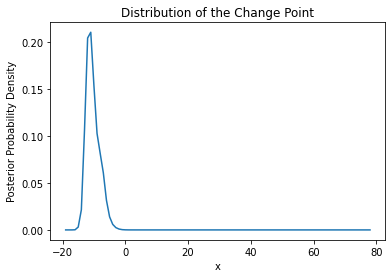

In [224]:
plt.plot(Reduced(x),CP_distr)
plt.xlabel("x")
plt.ylabel("Posterior Probability Density")
plt.title("Distribution of the Change Point")

### Now with the elbow data

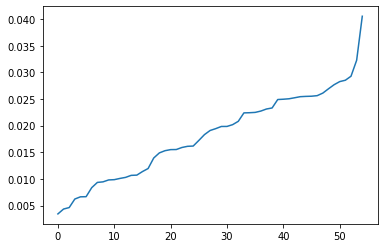

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

Text(0.5, 1.0, 'Distribution of the Change Point')

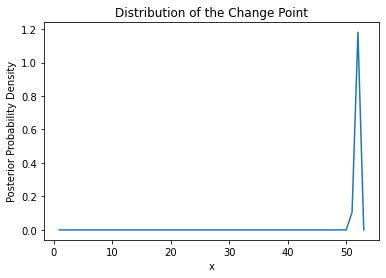

In [225]:
XDat = np.load("XAI_3.npy")
XDat_sort = np.sort(XDat)
XAI_x = np.arange(len(XDat_sort))

plt.plot(XAI_x,
         XDat_sort)
plt.show()
XAI_x = np.arange(len(XDat_sort))
CP_XAI = CP_Distribution(XAI_x,XDat_sort,1)
plt.plot(Reduced(XAI_x),CP_XAI)
plt.xlabel("x")
plt.ylabel("Posterior Probability Density")
plt.title("Distribution of the Change Point")

In [226]:
XDat

array([0.02311982, 0.02826782, 0.02495763, 0.01028134, 0.02242278,
       0.01611548, 0.02523238, 0.01908629, 0.02852306, 0.01984206,
       0.00621799, 0.0043378 , 0.02610788, 0.02691272, 0.00980281,
       0.0093364 , 0.00663391, 0.01984941, 0.01551223, 0.00461558,
       0.01589539, 0.02239217, 0.00985487, 0.0107073 , 0.00944314,
       0.01943554, 0.01137535, 0.02548956, 0.025628  , 0.0083557 ,
       0.01008525, 0.00342318, 0.01488148, 0.01549513, 0.0066582 ,
       0.02504158, 0.02768197, 0.02248415, 0.03226788, 0.02331512,
       0.02273436, 0.02552276, 0.01529348, 0.04053685, 0.01831263,
       0.01392361, 0.01066115, 0.02489975, 0.01721826, 0.0119444 ,
       0.01616475, 0.02080782, 0.02927583, 0.02543437, 0.02018364])

### And with less obvious elbow data

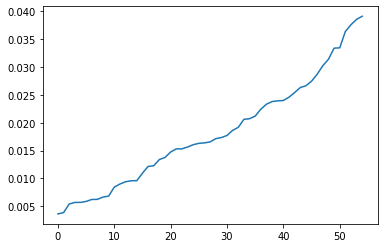

In [227]:
XDat = np.load("XAI_2.npy")
XDat_sort = np.sort(XDat)
XAI_x = np.arange(len(XDat_sort))

plt.plot(XAI_x,
         XDat_sort)


number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

Text(0.5, 1.0, 'Distribution of the Change Point')

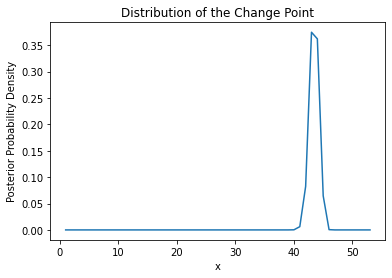

In [228]:
CP_XAI = CP_Distribution(XAI_x,XDat_sort,1)

plt.plot(Reduced(XAI_x),CP_XAI)
plt.xlabel("x")
plt.ylabel("Posterior Probability Density")
plt.title("Distribution of the Change Point")

In [229]:
print(CP_XAI)
print(np.argmax(CP_XAI))

[1.38106576e-24 2.20245409e-24 4.15029953e-24 7.95255766e-24
 1.44659488e-23 2.47083398e-23 3.83851703e-23 5.37886864e-23
 6.77505487e-23 8.32661615e-23 1.07276899e-22 1.42939324e-22
 1.90890224e-22 2.43901513e-22 3.06787009e-22 4.11158097e-22
 5.89410850e-22 9.20698771e-22 1.59679995e-21 3.18359103e-21
 7.59271150e-21 2.12982952e-20 6.96171330e-20 2.68537881e-19
 1.21894853e-18 6.25968812e-18 3.45020095e-17 2.03919323e-16
 1.20651286e-15 6.62183527e-15 3.48916988e-14 1.71915524e-13
 9.87810475e-13 6.10849887e-12 3.72350165e-11 2.87452563e-10
 3.77072020e-09 9.88769045e-08 4.50157491e-06 2.07155275e-04
 6.16459887e-03 8.24916480e-02 3.74695297e-01 3.62142374e-01
 6.44900735e-02 5.13766102e-04 5.67958248e-07 4.37580954e-10
 3.14050303e-13 6.76326877e-16 6.73642003e-19 2.46153536e-21
 0.00000000e+00]
42


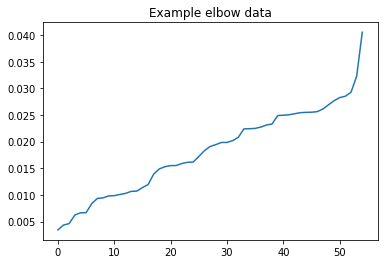

In [230]:
XDat = np.load("XAI_3.npy")
XDat_sort = np.sort(XDat)
XAI_x = np.arange(len(XDat_sort))

plt.plot(XAI_x,
         XDat_sort)
plt.title("Example elbow data")
plt.show()

## More selective Output

Make sure that the output of the function is 
1) The number of relevant terms
2) The index of the relevant terms

In [231]:
# all in one function
def CP_Distr(x,Y,n):
    y = np.sort(Y)
    
    
    CPFit = CPSegmentFit(x_data = x,
             y_data = y,
             number_expected_changepoints = n,
             num_MC_cp_samples = 1000000,
                   z_array_size = 100)
    
    CPFit.initialize_MC_cp_configurations(print_sum_control = True)
    CPFit.initialize_A_matrices()
    try:
        CPFit.Q_matrix_and_inverse_Q()
    except np.linalg.LinAlgError as err:
        if 'Singular matrix' in str(err):
            CPFit.initialize_MC_cp_configurations()
            CPFit.initialize_A_matrices()
            
    
    CPFit.calculate_f0()
    CPFit.calculate_residue()
    CPFit.calculate_marginal_likelihood()
    CPFit.calculate_marginal_cp_pdf()
    CPFit.calculate_prob_cp()
    
    Probabilities = CPFit.prob_cp
    
    # where is the maximum for the CP Distribution?
    PositionMaximum = np.argmax(Probabilities)
    # note that Probabilities "lost" the first and last index of y
    
    CP_Value = y[PositionMaximum+1] # +1 because y[0] has been disregarded
    
    RelevantIndex = (Y> CP_Value)
    
    return([sum(Y>CP_Value), RelevantIndex])

In [232]:
CP_Distr(XAI_x,XDat,1)

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

[2,
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False])]

In [233]:
print(CP_XAI)
print(XDat > np.sort(XDat)[np.argmax(CP_XAI+1)])

[1.38106576e-24 2.20245409e-24 4.15029953e-24 7.95255766e-24
 1.44659488e-23 2.47083398e-23 3.83851703e-23 5.37886864e-23
 6.77505487e-23 8.32661615e-23 1.07276899e-22 1.42939324e-22
 1.90890224e-22 2.43901513e-22 3.06787009e-22 4.11158097e-22
 5.89410850e-22 9.20698771e-22 1.59679995e-21 3.18359103e-21
 7.59271150e-21 2.12982952e-20 6.96171330e-20 2.68537881e-19
 1.21894853e-18 6.25968812e-18 3.45020095e-17 2.03919323e-16
 1.20651286e-15 6.62183527e-15 3.48916988e-14 1.71915524e-13
 9.87810475e-13 6.10849887e-12 3.72350165e-11 2.87452563e-10
 3.77072020e-09 9.88769045e-08 4.50157491e-06 2.07155275e-04
 6.16459887e-03 8.24916480e-02 3.74695297e-01 3.62142374e-01
 6.44900735e-02 5.13766102e-04 5.67958248e-07 4.37580954e-10
 3.14050303e-13 6.76326877e-16 6.73642003e-19 2.46153536e-21
 0.00000000e+00]
[False  True False False False False False False  True False False False
  True  True False False False False False False False False False False
 False False False  True  True False False F

In [234]:
CP_XAI.shape, XDat.shape

((53,), (55,))

In [235]:
XDat[np.argmax(XDat)]

0.0405368526383558

## Now with the full XAI data set

In [236]:
XAI = np.load("XAI_Finance.npy")
Names = np.load("Names.npy")
CorrMatrices = np.load("CorrMatricesTriangular.npy")
LabelNaiveOrdered = np.load("LabelNaiveOrdered.npy")
XAI.shape, Names

((5251, 55),
 array(['E', 'CD', 'F', 'I', 'U', 'CS', 'RE', 'Com', 'M', 'IT', 'HC'],
       dtype='<U3'))

In [237]:
Names = list(Names)

# E: Energy, CD: Constumer Discretionary, F: Financials, I: Industrials, U: Utilities, CS: Constumer Staples,
# RE: Real Estate, Com: Communication Services, M: Materials, IT: Information Technology, HC: Health Care

In [238]:
def plot_matrix(m, title='Correlation Matrix', cmap=plt.cm.Blues, labels= None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(m)
    plt.title(title,y=1.08)
    fig.colorbar(cax)
    
    
    xaxis = np.arange(len(labels))
    ax.set_xticks(xaxis)
    ax.set_yticks(xaxis)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    
    #ax.set_xticklabels([''] + labels)
    #ax.set_yticklabels([''] + labels)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.xlabel('Sectors')
    plt.ylabel('Sectors')
    plt.show()
   

In [239]:
# Transform back to original sectors

def ReverseDiag(Array, ZERO = False, MEAN = False):
    N = np.sqrt(2*len(Array)+0.25)+0.5
    N = int(N)
    Original = np.ones(int(N**2.)).reshape(1,-1)
    
    if ZERO:
        Original = np.zeros(int(N**2.)).reshape(1,-1)

    if MEAN:
        Original = Original * np.mean(Array) # mean interpolation for the diagonal

    index = np.triu(np.ones((N,N)),1)
    index = index.reshape(1,-1)
    index = index.astype(bool)
    
    Original[index] = Array # upper triangle
    Original = Original.reshape((N,N))
    Original = Original.T  # guarantee symmetry
    Original=Original.reshape(1,-1)
    Original[index] = Array
    Original=Original.reshape((N,N))

    return(Original)

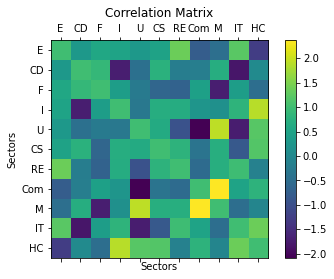

In [240]:
plot_matrix(ReverseDiag(np.random.normal(0,1,55)),
           labels = Names)

In [241]:
def PrintNames(Mat, Names):
    Out = list()
    for i in range(Mat.shape[0]):
        for j in range(i+1, Mat.shape[1]):
            if Mat[i,j]==1:
                Out.append(Names[i]+"/"+Names[j])
    return(Out)

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

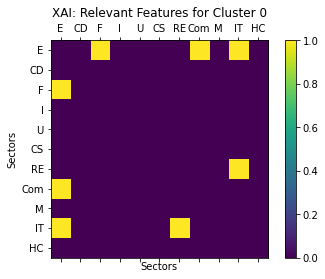

Relevant Correlations: ['E/F', 'E/Com', 'E/IT', 'RE/IT']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 

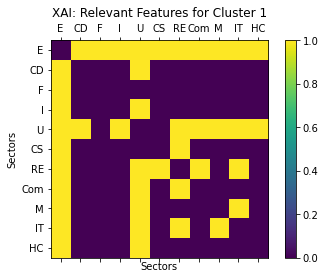

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/U', 'E/CS', 'E/RE', 'E/Com', 'E/M', 'E/IT', 'E/HC', 'CD/U', 'I/U', 'U/RE', 'U/Com', 'U/M', 'U/IT', 'U/HC', 'CS/RE', 'RE/Com', 'RE/IT', 'M/IT']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 

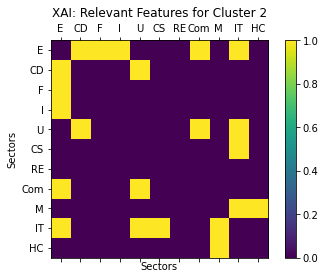

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/Com', 'E/IT', 'CD/U', 'U/Com', 'U/IT', 'CS/IT', 'M/IT', 'M/HC']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0.

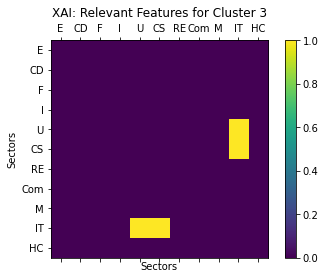

Relevant Correlations: ['U/IT', 'CS/IT']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [

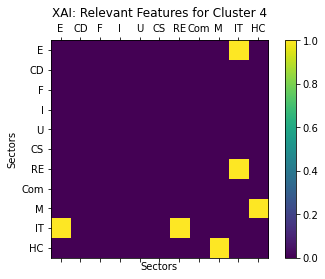

Relevant Correlations: ['E/IT', 'RE/IT', 'M/HC']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27.

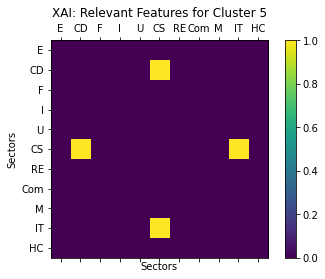

Relevant Correlations: ['CD/CS', 'CS/IT']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 

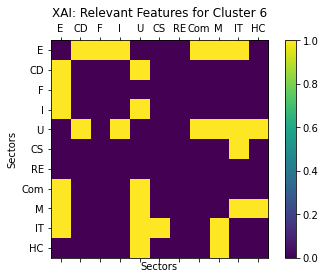

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/Com', 'E/M', 'E/IT', 'CD/U', 'I/U', 'U/Com', 'U/M', 'U/IT', 'U/HC', 'CS/IT', 'M/IT', 'M/HC']
 # # # # 
number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 

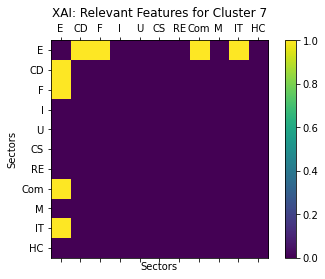

Relevant Correlations: ['E/CD', 'E/F', 'E/Com', 'E/IT']
 # # # # 


In [242]:
# and plots for each Cluster
for j in range(int(max(LabelNaiveOrdered)+1)):
    #DetectElbow(XAI[LabelNaiveOrdered==j,:].mean(0), 0, 50, 100, True)
    DE = CP_Distr(np.arange(XAI.shape[1]),
                  XAI[LabelNaiveOrdered==j,:].mean(0),
                  1)
    print(j, DE[0], DE[1] )
    
    relIndex = np.zeros(55)
    relIndex[DE[1]] = 1.
    RelMat = ReverseDiag(relIndex,
                       ZERO = True)
    plot_matrix(RelMat,
            title = "XAI: Relevant Features for Cluster "+str(j),
           labels = Names)
    print("Relevant Correlations:",PrintNames(RelMat, Names))
    
    print(" # # # # ")

In [243]:
# data for each Cluster

DE_list = list()

for j in range(int(max(LabelNaiveOrdered)+1)):
    #DetectElbow(XAI[LabelNaiveOrdered==j,:].mean(0), 0, 50, 100, True)
    DE = CP_Distr(np.arange(XAI.shape[1]),
                  XAI[LabelNaiveOrdered==j,:].mean(0),
                  1)
    DE_list.append(DE)
    print(j, DE[0], DE[1] )
    
   

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

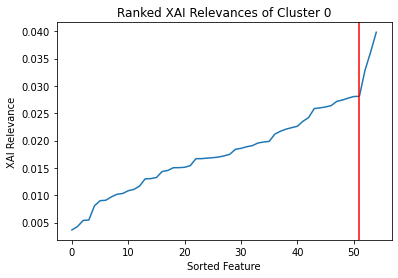

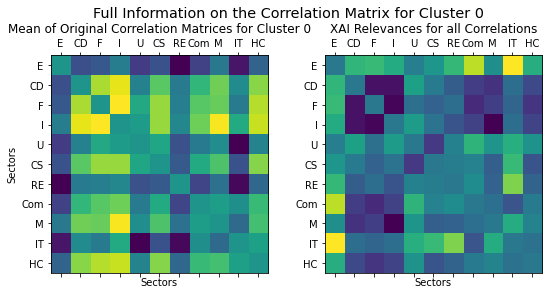

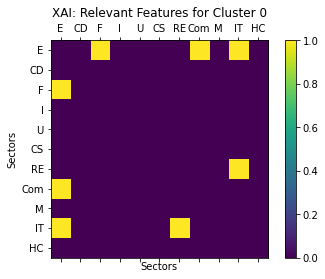

Relevant Correlations: ['E/F', 'E/Com', 'E/IT', 'RE/IT']
Cluster 0 is most XAI-influenced by correlation 8


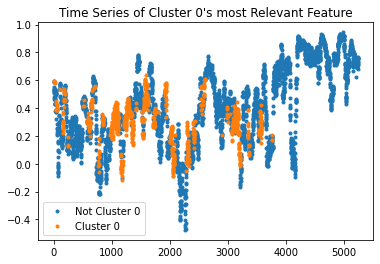

 # # # # 


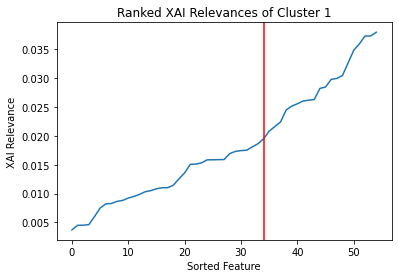

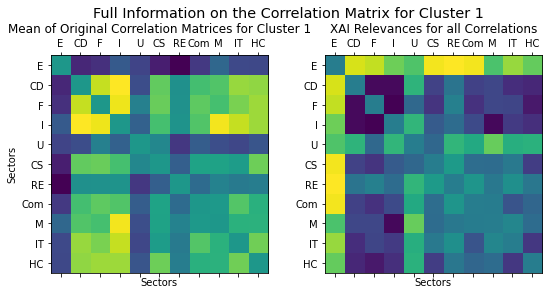

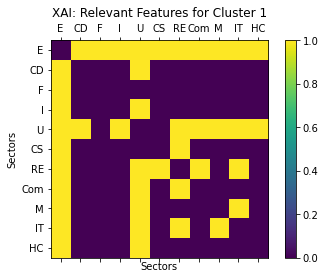

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/U', 'E/CS', 'E/RE', 'E/Com', 'E/M', 'E/IT', 'E/HC', 'CD/U', 'I/U', 'U/RE', 'U/Com', 'U/M', 'U/IT', 'U/HC', 'CS/RE', 'RE/Com', 'RE/IT', 'M/IT']
Cluster 1 is most XAI-influenced by correlation 5


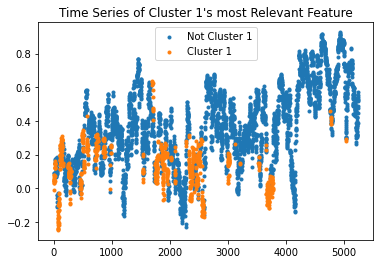

 # # # # 


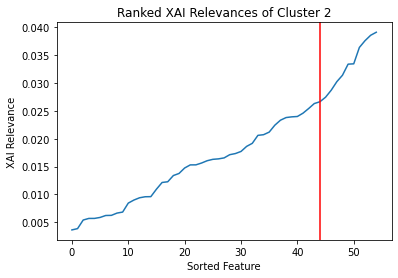

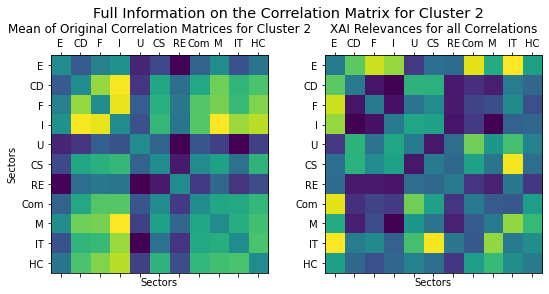

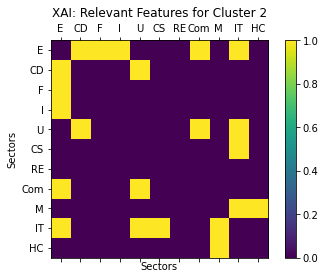

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/Com', 'E/IT', 'CD/U', 'U/Com', 'U/IT', 'CS/IT', 'M/IT', 'M/HC']
Cluster 2 is most XAI-influenced by correlation 8


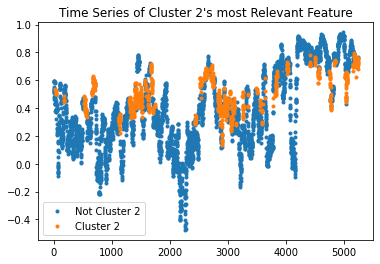

 # # # # 


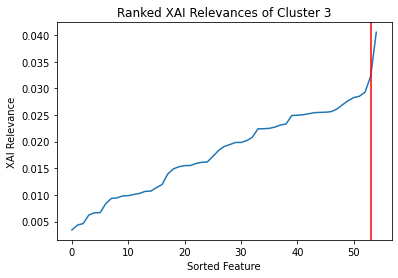

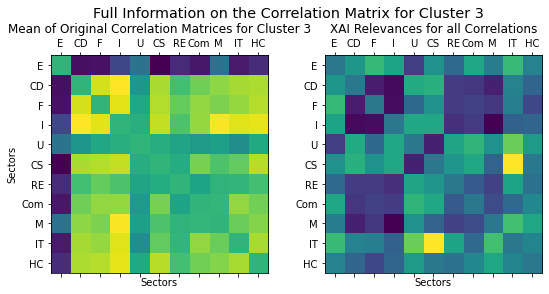

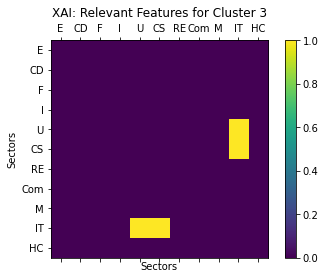

Relevant Correlations: ['U/IT', 'CS/IT']
Cluster 3 is most XAI-influenced by correlation 43


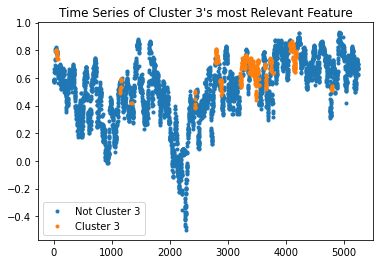

 # # # # 


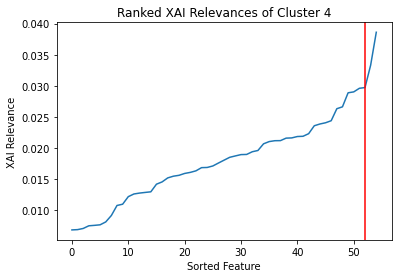

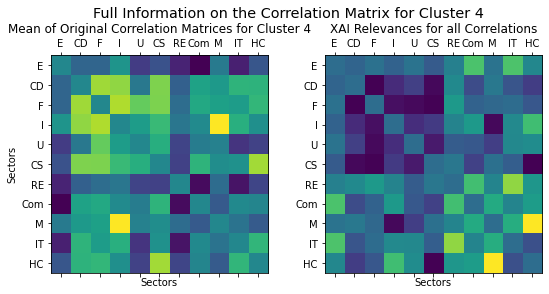

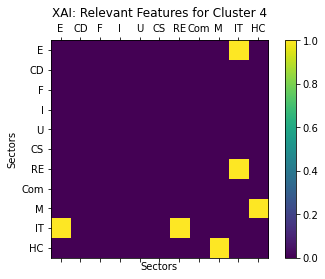

Relevant Correlations: ['E/IT', 'RE/IT', 'M/HC']
Cluster 4 is most XAI-influenced by correlation 53


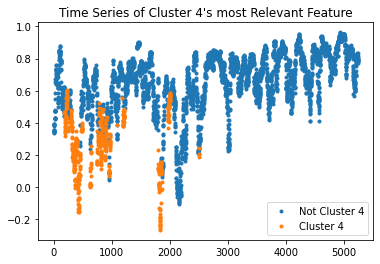

 # # # # 


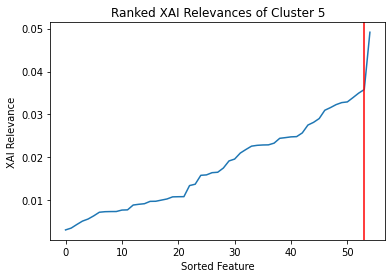

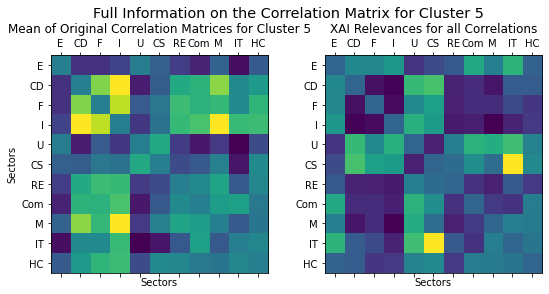

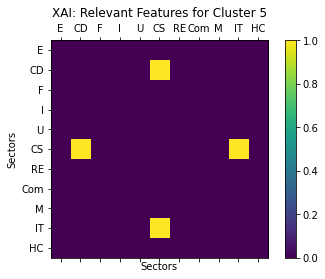

Relevant Correlations: ['CD/CS', 'CS/IT']
Cluster 5 is most XAI-influenced by correlation 43


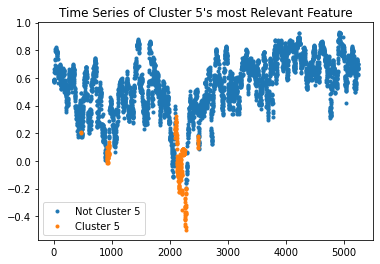

 # # # # 


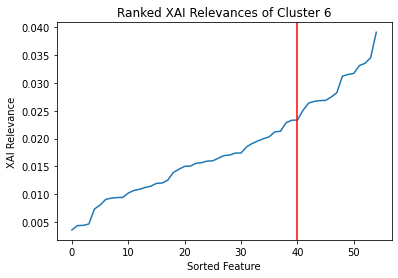

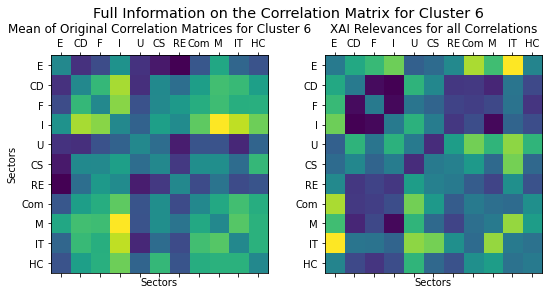

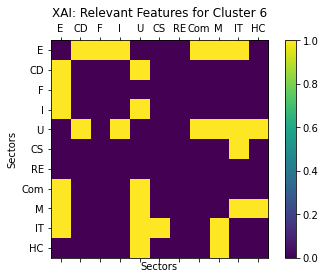

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/Com', 'E/M', 'E/IT', 'CD/U', 'I/U', 'U/Com', 'U/M', 'U/IT', 'U/HC', 'CS/IT', 'M/IT', 'M/HC']
Cluster 6 is most XAI-influenced by correlation 8


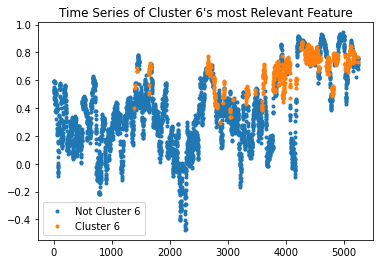

 # # # # 


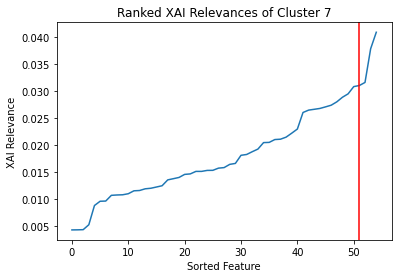

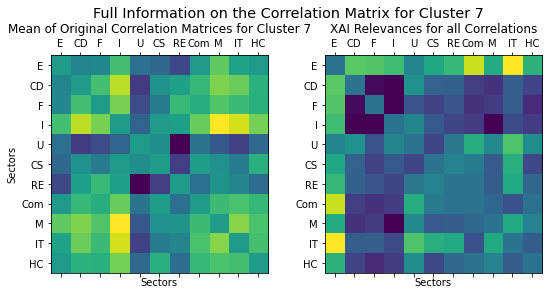

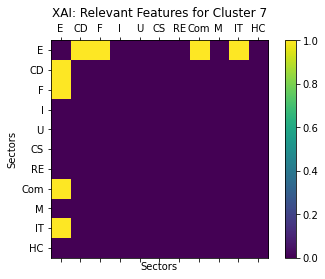

Relevant Correlations: ['E/CD', 'E/F', 'E/Com', 'E/IT']
Cluster 7 is most XAI-influenced by correlation 8


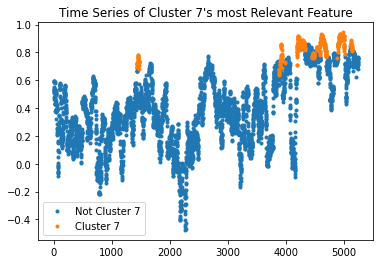

 # # # # 


In [244]:
# And plotting the results

for j in range(int(max(LabelNaiveOrdered)+1)):

    relIndex = np.zeros(55)
    relIndex[DE_list[j][1]] = 1.
    RelMat = ReverseDiag(relIndex,
                       ZERO = True)
    Sorted = np.sort(XAI[LabelNaiveOrdered==j,:].mean(0))
    plt.plot(Sorted)
    plt.xlabel("Sorted Feature")
    plt.ylabel("XAI Relevance")
    plt.title("Ranked XAI Relevances of Cluster "+str(j))
    plt.axvline(len(Sorted)-DE_list[j][0],c="red")
    plt.show()


    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Full Information on the Correlation Matrix for Cluster '+str(j),
                 fontsize = 'x-large',
                 y=1.05)
    fig.set_size_inches(9, 4)
    xaxis = np.arange(len(Names))

    ax1.matshow(ReverseDiag(CorrMatrices[LabelNaiveOrdered==j,:].mean(0),
                            MEAN = True))
    ax1.set_title("Mean of Original Correlation Matrices for Cluster " + str(j))
    ax1.set_xticks(xaxis)
    ax1.set_yticks(xaxis)
    ax1.set_xticklabels(Names)
    ax1.set_yticklabels(Names)

    ax2.matshow(ReverseDiag(XAI[LabelNaiveOrdered==j,:].mean(0), MEAN=True))
    ax2.set_title("XAI Relevances for all Correlations")
    ax2.set_xticks(xaxis)
    ax2.set_yticks(xaxis)
    ax2.set_xticklabels(Names)
    ax2.set_yticklabels(Names)

    ax1.set_xlabel('Sectors')
    ax1.set_ylabel('Sectors')
    ax2.set_xlabel('Sectors')
    plt.show()

    plot_matrix(RelMat,
            title = "XAI: Relevant Features for Cluster "+str(j),
           labels = Names)
    print("Relevant Correlations:",PrintNames(RelMat, Names))


    print("Cluster", j, "is most XAI-influenced by correlation",np.argmax(XAI[LabelNaiveOrdered==j,:].mean(0)))
    RelevantFeature = CorrMatrices[:,np.argmax(XAI[LabelNaiveOrdered==j,:].mean(0))]

    Time = np.arange(CorrMatrices.shape[0])

    plt.scatter(Time[LabelNaiveOrdered!=j],
            RelevantFeature[LabelNaiveOrdered!=j],
            marker =".", label="Not Cluster "+str(j))
    plt.scatter(Time[LabelNaiveOrdered==j],
            RelevantFeature[LabelNaiveOrdered==j],
            marker =".", label="Cluster "+str(j))
    plt.title("Time Series of Cluster "+str(j)+"'s most Relevant Feature")
    plt.legend()
    plt.show()

    print(" # # # # ")

In [245]:
BestFeature = np.zeros((len(DE_list),2)).astype("int")
for i in range(len(DE_list)):
    BestFeature[i,0] = int(i)
    BestFeature[i,1] = DE_list[i][0]
print(BestFeature)
np.save("OptimalXAIFeature",BestFeature)

[[ 0  4]
 [ 1 21]
 [ 2 11]
 [ 3  2]
 [ 4  3]
 [ 5  2]
 [ 6 15]
 [ 7  4]]


### Future work: include Prior

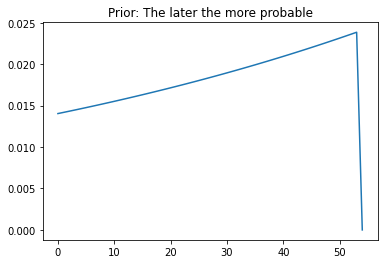

In [246]:
# prior on range(XAI.shape[1])
PriorRange = np.arange(XAI.shape[1])
Prior = np.exp(0.01*PriorRange)
Prior[-1] = 0
Prior = Prior/sum(Prior)
plt.title("Prior: The later the more probable")
plt.plot(Prior)

## Focus on the Modal Values instead of Means

In [247]:


def RankModes(Modals):
    # Takes tuple Modes with Modals[0] = list of features which appear as modal values at least once
    #                        Modals[1] = list of how often the features are modal values

    Moderanks = np.empty((len(Modals[0]),2)) # 2D array for feature and number of being modal value
    Moderanks[:,0], Moderanks[:,1] = Modals[0], Modals[1]
    Moderanks = Moderanks.astype("int")

    # fill up the features which are never a modal value for any instance
    Missings = set(range(CorrMatrices.shape[1])) - set(Moderanks[:,0])
    Missingranks = np.zeros((len(Missings),2)).astype("int") # are modal values for 0 instances
    Missingranks[:,0] = np.array(list(Missings))

    # and combine both arrays
    Moderanks = np.concatenate((Moderanks, Missingranks))
    Moderanks = Moderanks[Moderanks[:, 0].argsort()]

    return(Moderanks)

In [248]:
CP_Modal_list = list()


for j in range(1+int(max(LabelNaiveOrdered))):
    Modes = np.unique(np.argmax(XAI[LabelNaiveOrdered==j,:],1),
             return_counts=True)
    RM = RankModes(Modes)
    CP_Modal = CP_Distr(np.arange(XAI.shape[1]),
                  RM[:,1],
                  1)
    CP_Modal_list.append(CP_Modal)
    print(j, CP_Modal[0], CP_Modal[1] )

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

In [249]:
CP_Modal_list[5][1]

array([ True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False])

47


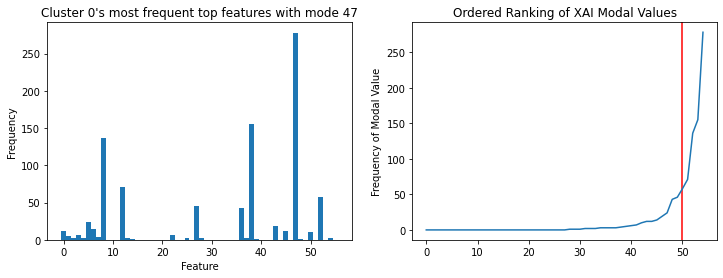

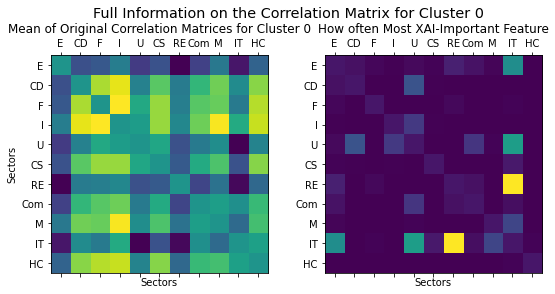

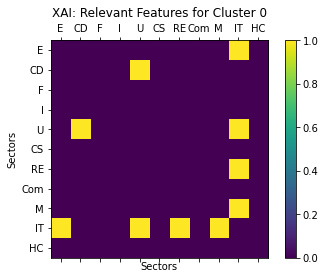

Relevant Correlations: ['E/IT', 'CD/U', 'U/IT', 'RE/IT', 'M/IT']
Cluster 0 is most XAI-influenced by correlation 47


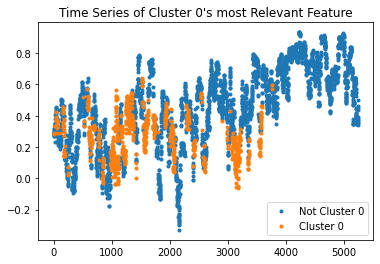

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
37


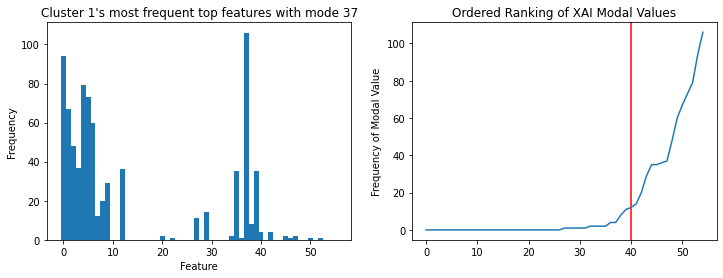

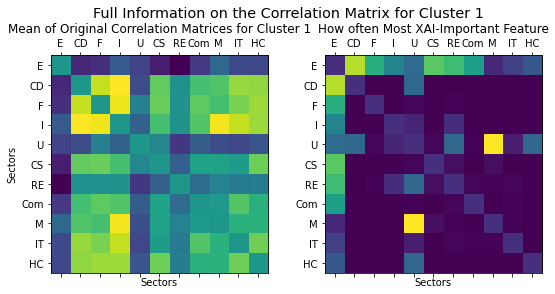

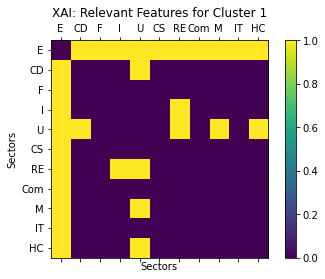

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/U', 'E/CS', 'E/RE', 'E/Com', 'E/M', 'E/IT', 'E/HC', 'CD/U', 'I/RE', 'U/RE', 'U/M', 'U/HC']
Cluster 1 is most XAI-influenced by correlation 37


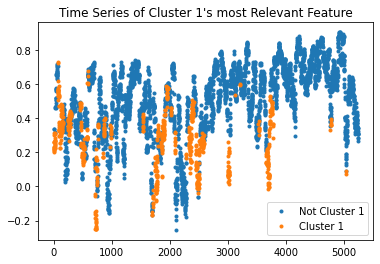

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
8


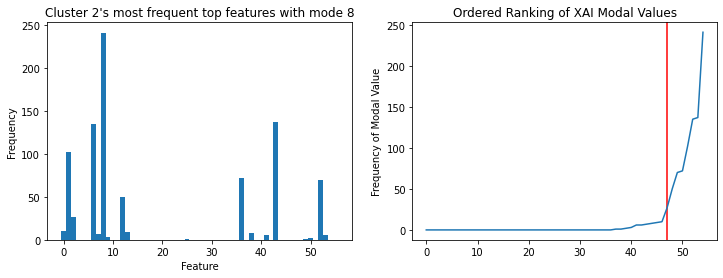

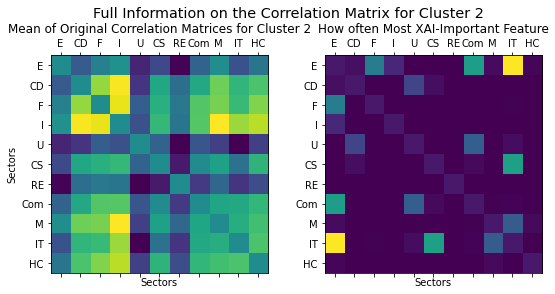

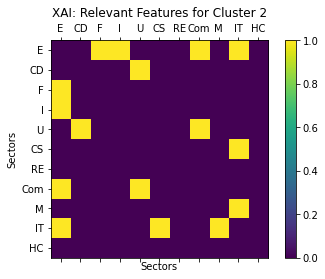

Relevant Correlations: ['E/F', 'E/I', 'E/Com', 'E/IT', 'CD/U', 'U/Com', 'CS/IT', 'M/IT']
Cluster 2 is most XAI-influenced by correlation 8


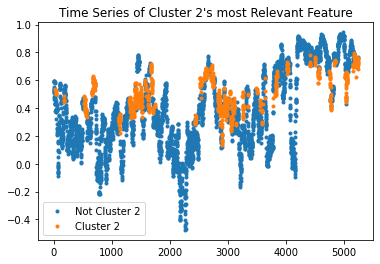

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
43


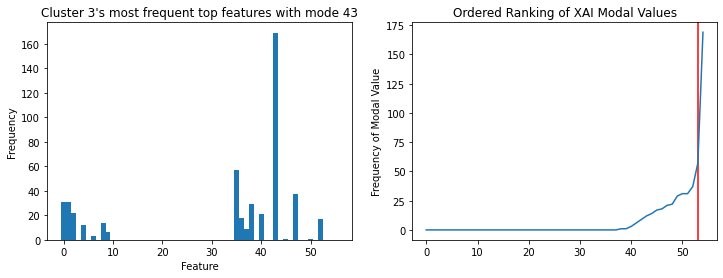

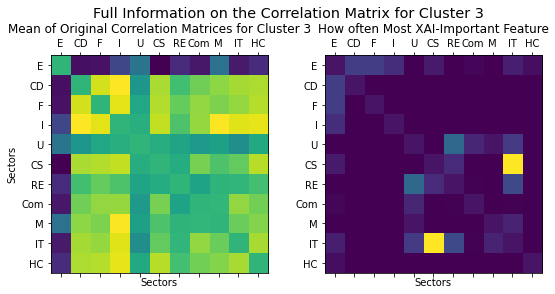

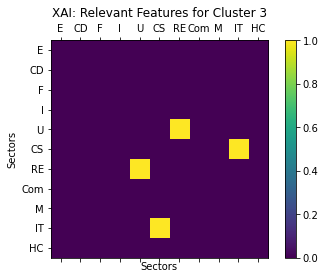

Relevant Correlations: ['U/RE', 'CS/IT']
Cluster 3 is most XAI-influenced by correlation 43


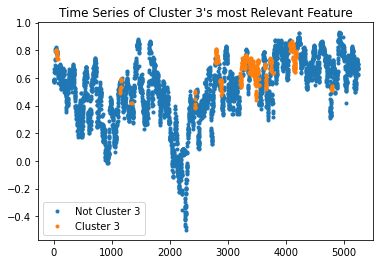

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
45


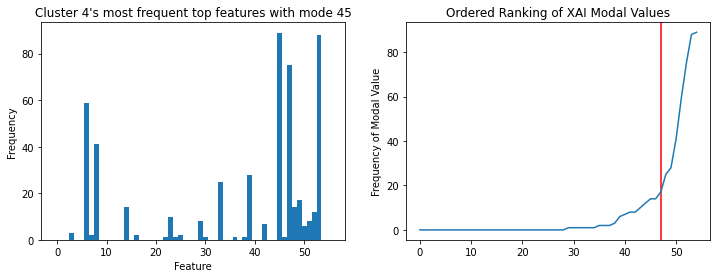

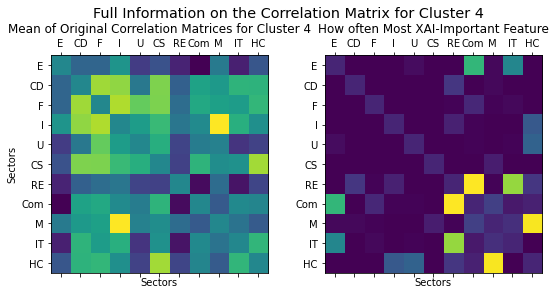

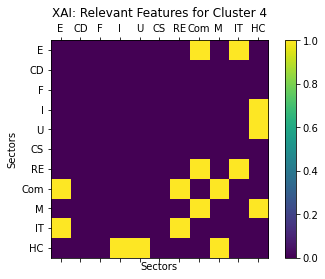

Relevant Correlations: ['E/Com', 'E/IT', 'I/HC', 'U/HC', 'RE/Com', 'RE/IT', 'Com/M', 'M/HC']
Cluster 4 is most XAI-influenced by correlation 45


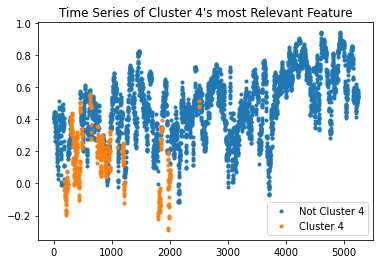

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
43


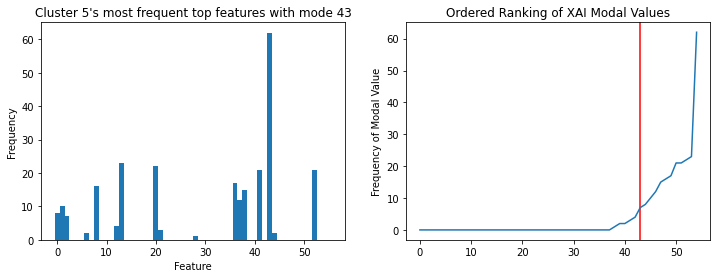

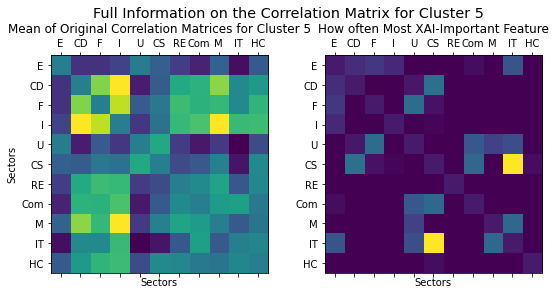

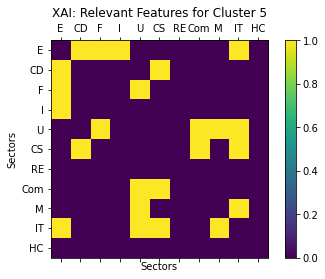

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/IT', 'CD/CS', 'F/U', 'U/Com', 'U/M', 'U/IT', 'CS/Com', 'CS/IT', 'M/IT']
Cluster 5 is most XAI-influenced by correlation 43


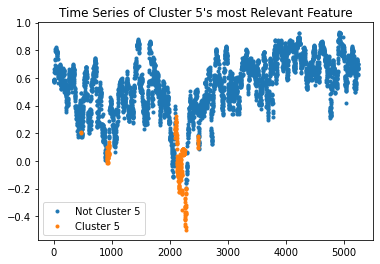

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
8


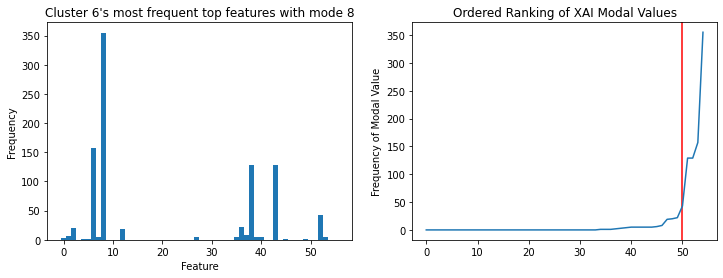

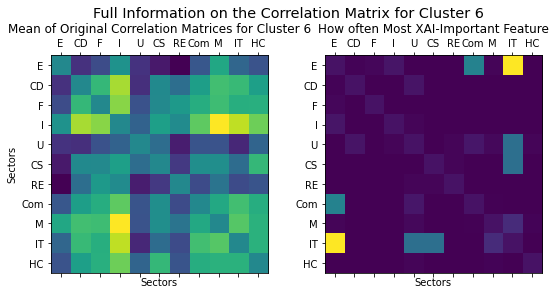

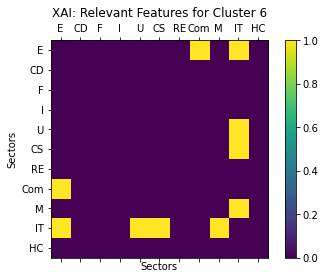

Relevant Correlations: ['E/Com', 'E/IT', 'U/IT', 'CS/IT', 'M/IT']
Cluster 6 is most XAI-influenced by correlation 8


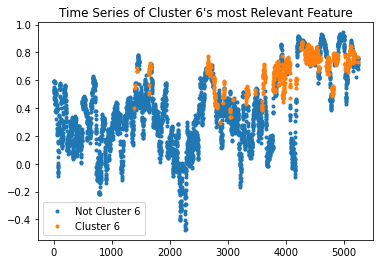

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
8


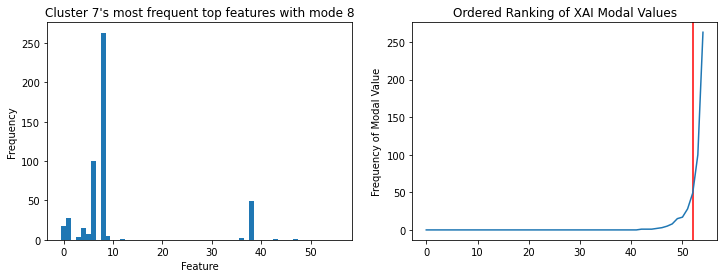

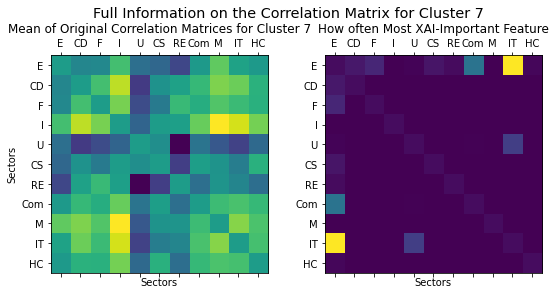

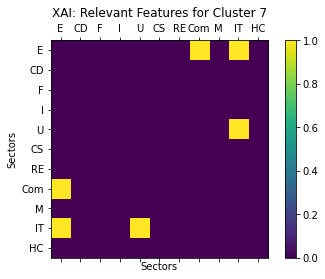

Relevant Correlations: ['E/Com', 'E/IT', 'U/IT']
Cluster 7 is most XAI-influenced by correlation 8


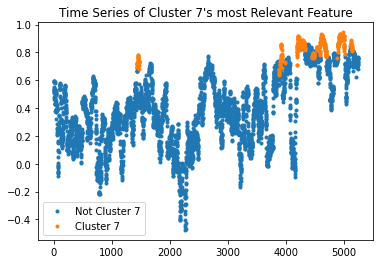

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#


In [250]:
XAI_modes = np.empty((int(max(LabelNaiveOrdered)+1),2))




for j in range(1+int(max(LabelNaiveOrdered))):
    XAI_j = XAI[LabelNaiveOrdered==j,:]

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    ax1.hist(np.argmax(XAI_j,1), bins = np.arange(-0.5,
                                            XAI.shape[1]+1.5,
                                            1))
    print(mode(np.argmax(XAI_j,1))[0][0])
    XAI_modes[j,0] = j
    XAI_modes[j,1] = int(mode(np.argmax(XAI_j,1))[0][0])
    ax1.set_title("Cluster "+str(j)+"'s most frequent top features with mode "
              + str(mode(np.argmax(XAI_j,1))[0][0]))
    ax1.set_xlabel("Feature")
    ax1.set_ylabel("Frequency")

    Modes = np.unique(np.argmax(XAI[LabelNaiveOrdered==j,:],1),
             return_counts=True)
    RM = RankModes(Modes)

    ax2.set_title("Ordered Ranking of XAI Modal Values")
    ax2.set_ylabel("Frequency of Modal Value")
    ax2.axvline(len(RM[:,1])-CP_Modal_list[j][0],c="red")
    ax2.plot(np.sort(RM[:,1]))
    plt.show()



    ############


    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Full Information on the Correlation Matrix for Cluster '+str(j),
                 fontsize = 'x-large',
                 y=1.05)
    fig.set_size_inches(9, 4)
    xaxis = np.arange(len(Names))

    ax1.matshow(ReverseDiag(CorrMatrices[LabelNaiveOrdered==j,:].mean(0),
                            MEAN = True))
    ax1.set_title("Mean of Original Correlation Matrices for Cluster " + str(j))
    ax1.set_xticks(xaxis)
    ax1.set_yticks(xaxis)
    ax1.set_xticklabels(Names)
    ax1.set_yticklabels(Names)

    ax2.matshow(ReverseDiag(RM[:,1], MEAN=True))
    ax2.set_title("How often Most XAI-Important Feature")
    ax2.set_xticks(xaxis)
    ax2.set_yticks(xaxis)
    ax2.set_xticklabels(Names)
    ax2.set_yticklabels(Names)

    ax1.set_xlabel('Sectors')
    ax1.set_ylabel('Sectors')
    ax2.set_xlabel('Sectors')
    plt.show()


    relIndex = np.zeros(55)
    relIndex[CP_Modal_list[j][1]] = 1.
    RelMat = ReverseDiag(relIndex,
                       ZERO = True)

    plot_matrix(RelMat,
            title = "XAI: Relevant Features for Cluster "+str(j),
           labels = Names)
    print("Relevant Correlations:",PrintNames(RelMat, Names))


    print("Cluster", j, "is most XAI-influenced by correlation",np.argmax(RM[:,1]))
    RelevantFeature = CorrMatrices[:,np.argmax(RM[:,1])]

    Time = np.arange(CorrMatrices.shape[0])

    plt.scatter(Time[LabelNaiveOrdered!=j],
            RelevantFeature[LabelNaiveOrdered!=j],
            marker =".", label="Not Cluster "+str(j))
    plt.scatter(Time[LabelNaiveOrdered==j],
            RelevantFeature[LabelNaiveOrdered==j],
            marker =".", label="Cluster "+str(j))
    plt.title("Time Series of Cluster "+str(j)+"'s most Relevant Feature")
    plt.legend()
    plt.show()

    print("#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#")

Makes sense that some features are used for more than one cluster because (my hypothesis:) their values help to differentiate exactly between those clusters

In [251]:
XAI_modes = XAI_modes.astype("int")
print(XAI_modes)
np.save("XAI_modes", XAI_modes)

[[ 0 47]
 [ 1 37]
 [ 2  8]
 [ 3 43]
 [ 4 45]
 [ 5 43]
 [ 6  8]
 [ 7  8]]


(array([ 0,  1,  3,  4,  5,  6,  8,  9, 12, 36, 38, 43, 47]), array([ 17,  28,   3,  15,   8, 100, 263,   5,   1,   2,  49,   1,   1]))


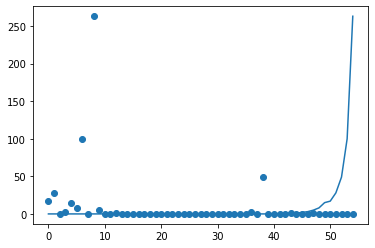

In [252]:
print(Modes)
Moderank = np.empty((len(Modes[0]),2))
Moderank[:,0], Moderank[:,1] = Modes[0], Modes[1]
Moderank = Moderank.astype("int")
Missing = set(range(CorrMatrices.shape[1])) - set(Moderank[:,0])
Missingrank = np.zeros((len(Missing),2)).astype("int")
Missingrank[:,0] = np.array(list(Missing))

Moderank = np.concatenate((Moderank, Missingrank))
Moderank = Moderank[Moderank[:, 0].argsort()]

plt.scatter(Moderank[:,0],
            Moderank[:,1])
plt.plot(Moderank[Moderank[:,1].argsort() ,1])

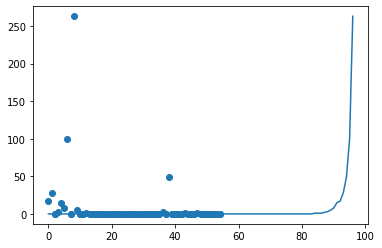

In [253]:


Moderank = np.concatenate((Moderank, Missingrank))
Moderank = Moderank[Moderank[:, 0].argsort()]

plt.scatter(Moderank[:,0],
            Moderank[:,1])
plt.plot(Moderank[Moderank[:,1].argsort() ,1])


def RankModes(Modals):
    # Takes tuple Modes with Modals[0] = list of features which appear as modal values at least once
    #                        Modals[1] = list of how often the features are modal values

    Moderanks = np.empty((len(Modals[0]),2)) # 2D array for feature and number of being modal value
    Moderanks[:,0], Moderanks[:,1] = Modals[0], Modals[1]
    Moderanks = Moderanks.astype("int")

    # fill up the features which are never a modal value for any instance
    Missings = set(range(CorrMatrices.shape[1])) - set(Moderanks[:,0])
    Missingranks = np.zeros((len(Missings),2)).astype("int") # are modal values for 0 instances
    Missingranks[:,0] = np.array(list(Missings))

    # and combine both arrays
    Moderanks = np.concatenate((Moderanks, Missingranks))
    Moderanks = Moderanks[Moderanks[:, 0].argsort()]

    return(Moderanks)

In [254]:
relIndex = np.zeros(55)
relIndex[DE_list[j][1]] = 1.
RelMat = ReverseDiag(relIndex,
                       ZERO = True)